In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the happy-only feature file
df_happy = pd.read_excel(r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\happydigital.xlsx")

# Assume df_happy has only numerical features (or drop any non-numeric columns)
# If there is an 'emotion' column, we drop it:
X_happy = df_happy.drop(columns=['emotion'], errors='ignore')

# Handle missing values
X_happy.fillna(X_happy.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_happy_scaled = scaler.fit_transform(X_happy)

# Train a one-class SVM on the happy data
ocsvm = OneClassSVM(kernel="rbf", gamma="auto", nu=0.1)  # nu sets an upper bound on the training error fraction
ocsvm.fit(X_happy_scaled)

# Now, to evaluate this model, you'll need test data that includes both happy and non-happy samples.
# Suppose you have a test file with a column 'emotion' where 'happy' indicates positive and any other value is negative.
df_test = pd.read_excel(r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\digital_test_features.xlsx")
X_test = df_test.drop(columns=['emotion'], errors='ignore')
y_true = df_test['emotion'].apply(lambda x: 1 if x.strip().lower() == 'happy' else -1)

X_test.fillna(X_test.mean(), inplace=True)
X_test_scaled = scaler.transform(X_test)

# Predict using the one-class SVM
y_pred = ocsvm.predict(X_test_scaled)

print("One-Class SVM Classification Report:")
print(classification_report(y_true, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=["Non-Happy (-1)", "Happy (+1)"],
            yticklabels=["Non-Happy (-1)", "Happy (+1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("One-Class SVM Confusion Matrix")
plt.show()


TypeError: Could not convert ['happy1.jpghappy10.jpghappy11.jpghappy12.jpghappy13.jpghappy14.jpghappy15.jpghappy16.jpghappy17.jpghappy18.jpghappy19.jpghappy2.jpghappy20.jpghappy21.jpghappy22.jpghappy23.jpghappy24.jpghappy25.jpghappy26.jpghappy27.jpghappy28.jpghappy29.jpghappy3.jpghappy30.jpghappy31.jpghappy32.jpghappy33.jpghappy34.jpghappy35.jpghappy36.jpghappy37.jpghappy38.jpghappy39.jpghappy4.jpghappy40.jpghappy41.jpghappy42.jpghappy43.jpghappy44.jpghappy45.jpghappy46.jpghappy47.jpghappy48.jpghappy49.jpghappy5.jpg'
 'HAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPYHAPPY'] to numeric

✅ Successfully loaded: Angry - (48, 22)
✅ Successfully loaded: Fear - (45, 23)
✅ Successfully loaded: Happy - (45, 23)
✅ Successfully loaded: Normal - (45, 23)
✅ Successfully loaded: Sad - (47, 23)
✅ Successfully loaded: Surprise - (49, 23)

🧐 Checking Columns: Index(['Emotions', 'Contrast', 'Energy', 'Homogeneity', 'Correlation',
       'MeanPixelIntensity', 'StdDev', 'Variance', 'EntropyPixelIntensity',
       'Skewness', 'ORB Keypoints', 'ORB Descriptor Mean',
       'ORB Descriptor StdDev', 'ORB Descriptor Variance', 'SIFT Keypoints',
       'SIFT Descriptor Mean', 'SIFT Descriptor StdDev',
       'SIFT Descriptor Variance', 'AKAZE Keypoints', 'AKAZE Descriptor Mean',
       'AKAZE Descriptor StdDev', 'AKAZE Descriptor Variance', 'emotion',
       'ImageName'],
      dtype='object')

✅ Accuracy: 0.89

🔎 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.89      1.00      0.94     

C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


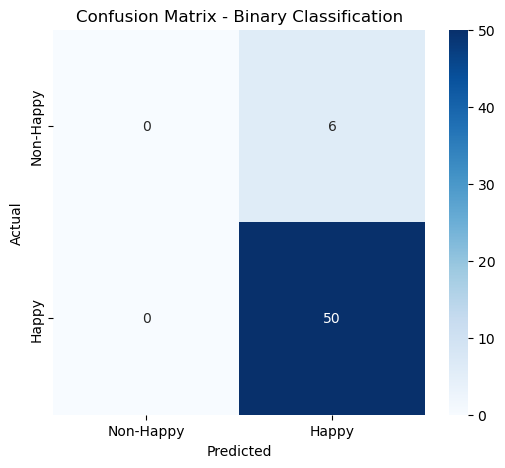

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📌 File Paths for Each Emotion
file_paths = {
    "Angry": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\angrydigital.xlsx",
    "Fear": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\feardigital.xlsx",
    "Happy": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\happydigital.xlsx",
    "Normal": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\normaldigital.xlsx",
    "Sad": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\saddigital.xlsx",
    "Surprise": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\surprisedigital.xlsx"
}

# 📂 Load Feature Files for All Emotions
df_list = []
for emotion, path in file_paths.items():
    try:
        df = pd.read_excel(path)
        print(f"✅ Successfully loaded: {emotion} - {df.shape}")
        
        # 🚨 Fix: Add 'emotion' column if missing
        if "emotion" not in df.columns:
            df["emotion"] = emotion  # Manually assign emotion labels
        
        df_list.append(df)
    except Exception as e:
        print(f"❌ Error loading {emotion}: {e}")

# 🛠 Merge Data
df = pd.concat(df_list, ignore_index=True)

# 🛠 Check if 'emotion' is present
print("\n🧐 Checking Columns:", df.columns)

# 🚨 Ensure 'emotion' column exists before proceeding
if "emotion" not in df.columns:
    raise ValueError("🚨 ERROR: 'emotion' column is missing. Check dataset structure.")

# 🎯 Binary Classification: Happy vs. Non-Happy
df["emotion"] = df["emotion"].apply(lambda x: "Happy" if x == "Happy" else "Non-Happy")

# 🔢 Encode Emotion Labels (0 = Non-Happy, 1 = Happy)
label_encoder = LabelEncoder()
df["emotion"] = label_encoder.fit_transform(df["emotion"])

# 🔍 Drop Non-Numeric Columns
df = df.select_dtypes(include=[np.number])

# Handle Missing Values
df.fillna(df.mean(), inplace=True)

# 🎯 Features & Target
X = df.drop(columns=["emotion"])
y = df["emotion"]

# 🔬 Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📊 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🚀 Classifier - Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 🎯 Results
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {acc:.2f}")
print("\n🔎 Classification Report:\n", classification_report(y_test, y_pred))

# 📊 Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", xticklabels=["Non-Happy", "Happy"], yticklabels=["Non-Happy", "Happy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Binary Classification")
plt.show()


✅ Successfully loaded: Angry - (48, 22)
✅ Successfully loaded: Fear - (45, 23)
✅ Successfully loaded: Happy - (45, 23)
✅ Successfully loaded: Normal - (45, 23)
✅ Successfully loaded: Sad - (47, 23)
✅ Successfully loaded: Surprise - (49, 23)

🧐 Columns in merged DataFrame: Index(['Emotions', 'Contrast', 'Energy', 'Homogeneity', 'Correlation',
       'MeanPixelIntensity', 'StdDev', 'Variance', 'EntropyPixelIntensity',
       'Skewness', 'ORB Keypoints', 'ORB Descriptor Mean',
       'ORB Descriptor StdDev', 'ORB Descriptor Variance', 'SIFT Keypoints',
       'SIFT Descriptor Mean', 'SIFT Descriptor StdDev',
       'SIFT Descriptor Variance', 'AKAZE Keypoints', 'AKAZE Descriptor Mean',
       'AKAZE Descriptor StdDev', 'AKAZE Descriptor Variance', 'emotion',
       'ImageName'],
      dtype='object')

===== Binary Classification for 'Angry' vs. All Others =====
✅ Accuracy for 'Angry' vs. All Others: 0.79
🔎 Classification Report:
              precision    recall  f1-score   support

     

C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


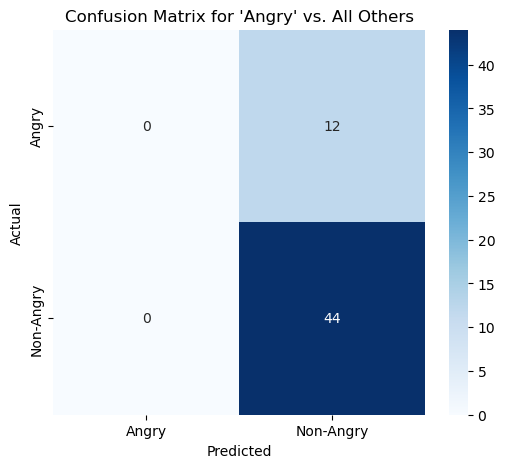


===== Binary Classification for 'Fear' vs. All Others =====
✅ Accuracy for 'Fear' vs. All Others: 0.84
🔎 Classification Report:
              precision    recall  f1-score   support

        Fear       0.50      0.11      0.18         9
    Non-Fear       0.85      0.98      0.91        47

    accuracy                           0.84        56
   macro avg       0.68      0.54      0.55        56
weighted avg       0.80      0.84      0.79        56



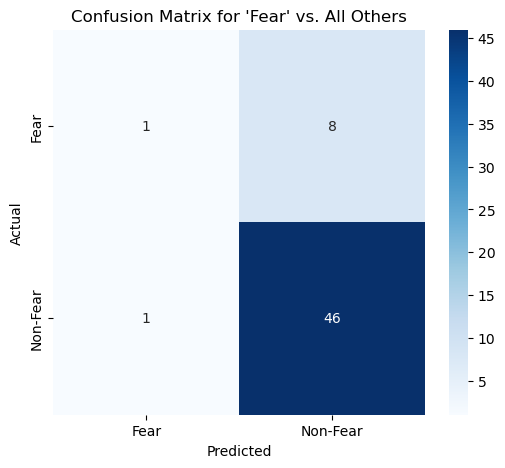


===== Binary Classification for 'Happy' vs. All Others =====
✅ Accuracy for 'Happy' vs. All Others: 0.89
🔎 Classification Report:
              precision    recall  f1-score   support

       Happy       0.00      0.00      0.00         6
   Non-Happy       0.89      1.00      0.94        50

    accuracy                           0.89        56
   macro avg       0.45      0.50      0.47        56
weighted avg       0.80      0.89      0.84        56



C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


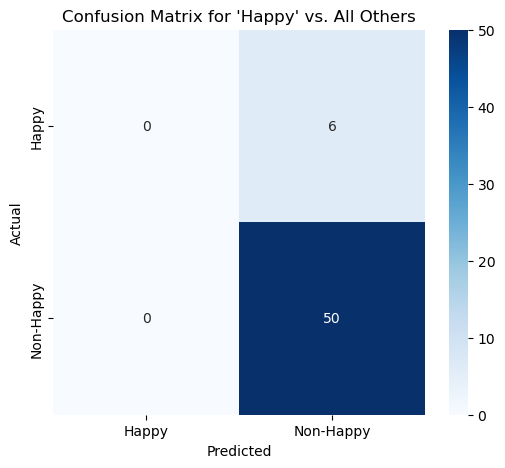


===== Binary Classification for 'Normal' vs. All Others =====
✅ Accuracy for 'Normal' vs. All Others: 0.82
🔎 Classification Report:
              precision    recall  f1-score   support

  Non-Normal       0.82      1.00      0.90        46
      Normal       0.00      0.00      0.00        10

    accuracy                           0.82        56
   macro avg       0.41      0.50      0.45        56
weighted avg       0.67      0.82      0.74        56



C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


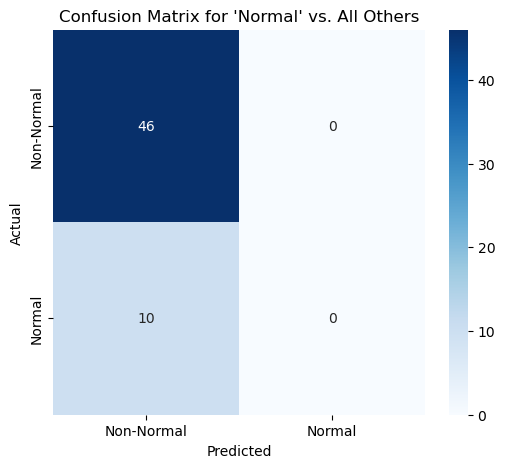


===== Binary Classification for 'Sad' vs. All Others =====
✅ Accuracy for 'Sad' vs. All Others: 0.86
🔎 Classification Report:
              precision    recall  f1-score   support

     Non-Sad       0.86      1.00      0.92        48
         Sad       0.00      0.00      0.00         8

    accuracy                           0.86        56
   macro avg       0.43      0.50      0.46        56
weighted avg       0.73      0.86      0.79        56



C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


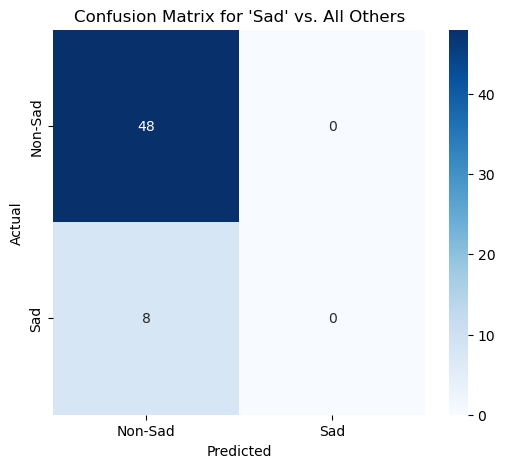


===== Binary Classification for 'Surprise' vs. All Others =====
✅ Accuracy for 'Surprise' vs. All Others: 0.80
🔎 Classification Report:
              precision    recall  f1-score   support

Non-Surprise       0.80      1.00      0.89        45
    Surprise       0.00      0.00      0.00        11

    accuracy                           0.80        56
   macro avg       0.40      0.50      0.45        56
weighted avg       0.65      0.80      0.72        56



C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


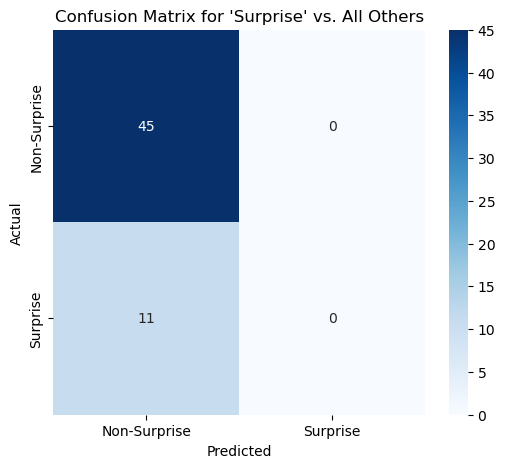

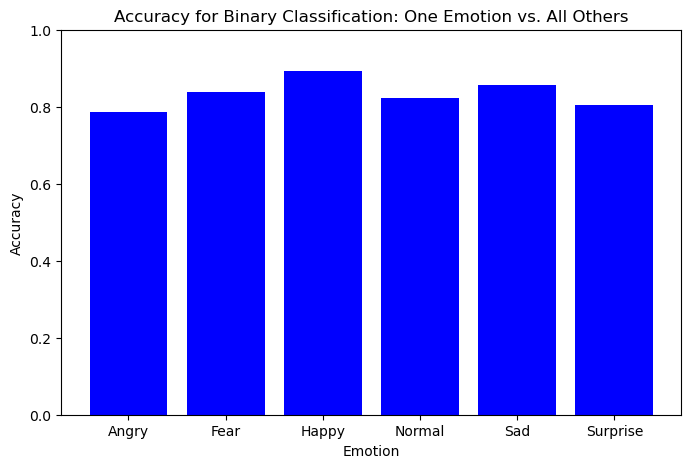


🔹 Final Accuracies:
Angry: 0.79
Fear: 0.84
Happy: 0.89
Normal: 0.82
Sad: 0.86
Surprise: 0.80


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# =========================
# 1. Load the Data
# =========================

# 📌 File Paths for Each Emotion
file_paths = {
    "Angry": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\angrydigital.xlsx",
    "Fear": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\feardigital.xlsx",
    "Happy": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\happydigital.xlsx",
    "Normal": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\normaldigital.xlsx",
    "Sad": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\saddigital.xlsx",
    "Surprise": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\surprisedigital.xlsx"
}

# Load each file and ensure the 'emotion' column is present.
df_list = []
for emotion, path in file_paths.items():
    try:
        df = pd.read_excel(path)
        print(f"✅ Successfully loaded: {emotion} - {df.shape}")
        if "emotion" not in df.columns:
            df["emotion"] = emotion  # Assign emotion if missing
        df_list.append(df)
    except Exception as e:
        print(f"❌ Error loading {emotion}: {e}")

# Merge all emotion data into one DataFrame
df = pd.concat(df_list, ignore_index=True)
print("\n🧐 Columns in merged DataFrame:", df.columns)

# =========================
# 2. Binary Classification: One Emotion vs. All Others
# =========================

# List of emotions to classify in a one-vs-all manner.
emotions = ["Angry", "Fear", "Happy", "Normal", "Sad", "Surprise"]

# Dictionary to store accuracies for each emotion classifier.
accuracy_results = {}

for current_emotion in emotions:
    print(f"\n===== Binary Classification for '{current_emotion}' vs. All Others =====")
    
    # Create a new binary target column:
    #   Positive class: current emotion
    #   Negative class: all other emotions labeled as "Non-{current_emotion}"
    df_copy = df.copy()
    df_copy["binary_emotion"] = df_copy["emotion"].apply(
        lambda x: current_emotion if x == current_emotion else "Non-" + current_emotion
    )
    
    # Encode the binary labels: (e.g., "Happy" becomes 1 and "Non-Happy" becomes 0)
    le = LabelEncoder()
    df_copy["binary_emotion"] = le.fit_transform(df_copy["binary_emotion"])
    
    # Keep only numeric columns (features and the new target)
    df_copy = df_copy.select_dtypes(include=[np.number])
    
    # Handle missing values by filling them with the mean of the column
    df_copy.fillna(df_copy.mean(), inplace=True)
    
    # Separate features (X) and target (y)
    X = df_copy.drop(columns=["binary_emotion"])
    y = df_copy["binary_emotion"]
    
    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train-Test Split (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Train the classifier (Random Forest in this example)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[current_emotion] = acc
    print(f"✅ Accuracy for '{current_emotion}' vs. All Others: {acc:.2f}")
    
    # Print the classification report
    print("🔎 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for '{current_emotion}' vs. All Others")
    plt.show()

# =========================
# 3. Summary of Accuracies
# =========================

plt.figure(figsize=(8, 5))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='blue')
plt.xlabel("Emotion")
plt.ylabel("Accuracy")
plt.title("Accuracy for Binary Classification: One Emotion vs. All Others")
plt.ylim(0, 1)
plt.show()

print("\n🔹 Final Accuracies:")
for emotion, acc in accuracy_results.items():
    print(f"{emotion}: {acc:.2f}")


✅ Successfully loaded: Angry - (48, 22)
✅ Successfully loaded: Fear - (45, 23)
✅ Successfully loaded: Happy - (45, 23)
✅ Successfully loaded: Normal - (45, 23)
✅ Successfully loaded: Sad - (47, 23)
✅ Successfully loaded: Surprise - (49, 23)

🧐 Columns in merged DataFrame: Index(['Emotions', 'Contrast', 'Energy', 'Homogeneity', 'Correlation',
       'MeanPixelIntensity', 'StdDev', 'Variance', 'EntropyPixelIntensity',
       'Skewness', 'ORB Keypoints', 'ORB Descriptor Mean',
       'ORB Descriptor StdDev', 'ORB Descriptor Variance', 'SIFT Keypoints',
       'SIFT Descriptor Mean', 'SIFT Descriptor StdDev',
       'SIFT Descriptor Variance', 'AKAZE Keypoints', 'AKAZE Descriptor Mean',
       'AKAZE Descriptor StdDev', 'AKAZE Descriptor Variance', 'emotion',
       'ImageName'],
      dtype='object')

===== Binary Classification for 'Angry' vs. All Others =====
✅ Accuracy for 'Angry' vs. All Others: 0.79
🔎 Classification Report:
              precision    recall  f1-score   support

     

C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


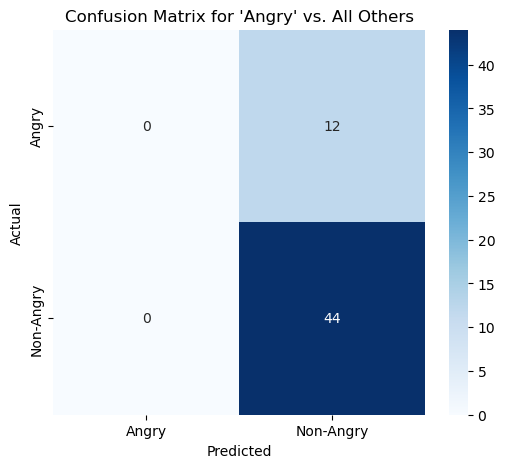


===== Binary Classification for 'Fear' vs. All Others =====
✅ Accuracy for 'Fear' vs. All Others: 0.84
🔎 Classification Report:
              precision    recall  f1-score   support

        Fear       0.00      0.00      0.00         9
    Non-Fear       0.84      1.00      0.91        47

    accuracy                           0.84        56
   macro avg       0.42      0.50      0.46        56
weighted avg       0.70      0.84      0.77        56



C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


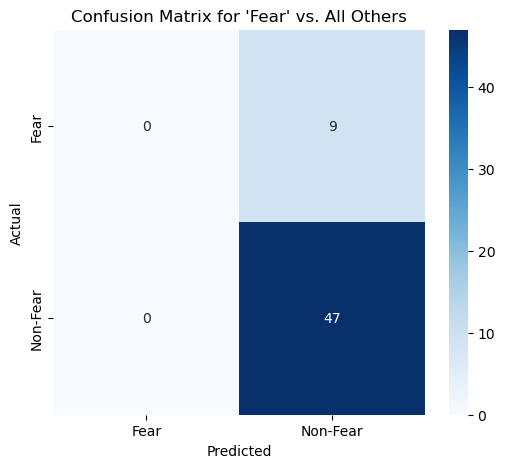


===== Binary Classification for 'Happy' vs. All Others =====
✅ Accuracy for 'Happy' vs. All Others: 0.89
🔎 Classification Report:
              precision    recall  f1-score   support

       Happy       0.00      0.00      0.00         6
   Non-Happy       0.89      1.00      0.94        50

    accuracy                           0.89        56
   macro avg       0.45      0.50      0.47        56
weighted avg       0.80      0.89      0.84        56



C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


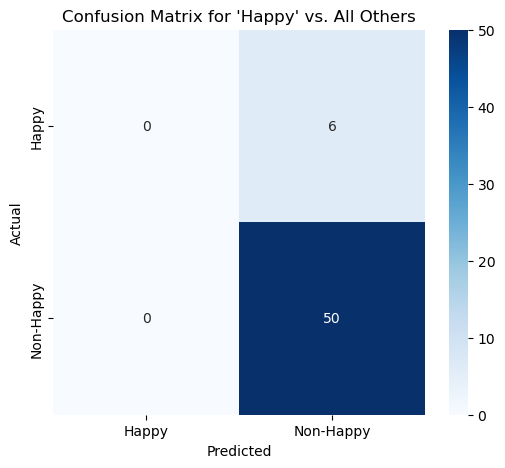


===== Binary Classification for 'Normal' vs. All Others =====
✅ Accuracy for 'Normal' vs. All Others: 0.82
🔎 Classification Report:
              precision    recall  f1-score   support

  Non-Normal       0.82      1.00      0.90        46
      Normal       0.00      0.00      0.00        10

    accuracy                           0.82        56
   macro avg       0.41      0.50      0.45        56
weighted avg       0.67      0.82      0.74        56



C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


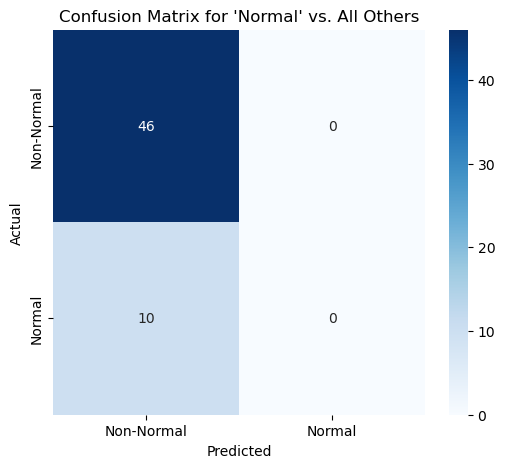


===== Binary Classification for 'Sad' vs. All Others =====
✅ Accuracy for 'Sad' vs. All Others: 0.86
🔎 Classification Report:
              precision    recall  f1-score   support

     Non-Sad       0.86      1.00      0.92        48
         Sad       0.00      0.00      0.00         8

    accuracy                           0.86        56
   macro avg       0.43      0.50      0.46        56
weighted avg       0.73      0.86      0.79        56



C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


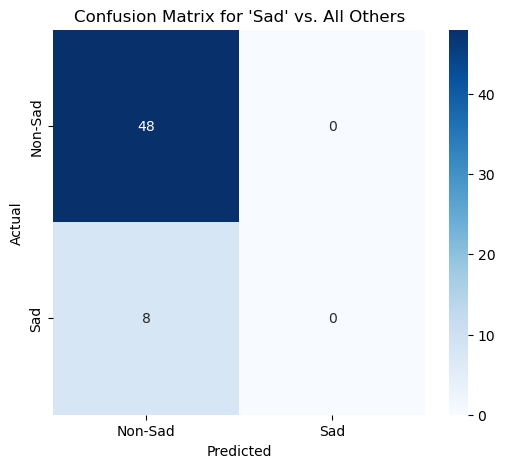


===== Binary Classification for 'Surprise' vs. All Others =====
✅ Accuracy for 'Surprise' vs. All Others: 0.80
🔎 Classification Report:
              precision    recall  f1-score   support

Non-Surprise       0.80      1.00      0.89        45
    Surprise       0.00      0.00      0.00        11

    accuracy                           0.80        56
   macro avg       0.40      0.50      0.45        56
weighted avg       0.65      0.80      0.72        56



C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


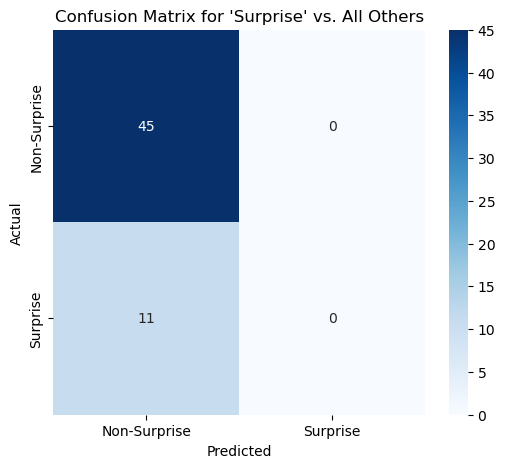

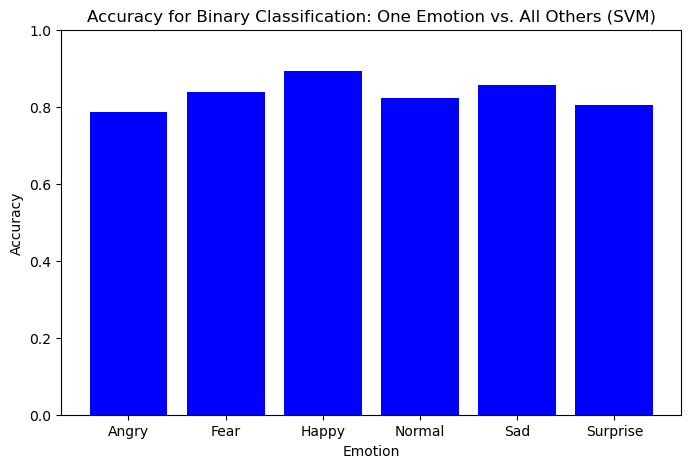


🔹 Final Accuracies:
Angry: 0.79
Fear: 0.84
Happy: 0.89
Normal: 0.82
Sad: 0.86
Surprise: 0.80


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# =========================
# 1. Load the Data
# =========================

# 📌 File Paths for Each Emotion
file_paths = {
    "Angry": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\angrydigital.xlsx",
    "Fear": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\feardigital.xlsx",
    "Happy": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\happydigital.xlsx",
    "Normal": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\normaldigital.xlsx",
    "Sad": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\saddigital.xlsx",
    "Surprise": r"C:\Users\bibek\Downloads\PROJECT2\correlation2\digitalemotion\surprisedigital.xlsx"
}

# Load each file and ensure the 'emotion' column is present.
df_list = []
for emotion, path in file_paths.items():
    try:
        df = pd.read_excel(path)
        print(f"✅ Successfully loaded: {emotion} - {df.shape}")
        if "emotion" not in df.columns:
            df["emotion"] = emotion  # Assign emotion if missing
        df_list.append(df)
    except Exception as e:
        print(f"❌ Error loading {emotion}: {e}")

# Merge all emotion data into one DataFrame
df = pd.concat(df_list, ignore_index=True)
print("\n🧐 Columns in merged DataFrame:", df.columns)

# =========================
# 2. Binary Classification: One Emotion vs. All Others using SVM
# =========================

# List of emotions to classify in a one-vs-all manner.
emotions = ["Angry", "Fear", "Happy", "Normal", "Sad", "Surprise"]

# Dictionary to store accuracies for each emotion classifier.
accuracy_results = {}

for current_emotion in emotions:
    print(f"\n===== Binary Classification for '{current_emotion}' vs. All Others =====")
    
    # Create a new binary target column:
    #   Positive class: current emotion
    #   Negative class: all other emotions labeled as "Non-{current_emotion}"
    df_copy = df.copy()
    df_copy["binary_emotion"] = df_copy["emotion"].apply(
        lambda x: current_emotion if x == current_emotion else "Non-" + current_emotion
    )
    
    # Encode the binary labels: (e.g., "Happy" becomes 1 and "Non-Happy" becomes 0)
    le = LabelEncoder()
    df_copy["binary_emotion"] = le.fit_transform(df_copy["binary_emotion"])
    
    # Keep only numeric columns (features and the new target)
    df_copy = df_copy.select_dtypes(include=[np.number])
    
    # Handle missing values by filling them with the mean of the column
    df_copy.fillna(df_copy.mean(), inplace=True)
    
    # Separate features (X) and target (y)
    X = df_copy.drop(columns=["binary_emotion"])
    y = df_copy["binary_emotion"]
    
    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train-Test Split (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Train the classifier (SVM with RBF kernel)
    clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[current_emotion] = acc
    print(f"✅ Accuracy for '{current_emotion}' vs. All Others: {acc:.2f}")
    
    # Print the classification report
    print("🔎 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for '{current_emotion}' vs. All Others")
    plt.show()

# =========================
# 3. Summary of Accuracies
# =========================

plt.figure(figsize=(8, 5))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='blue')
plt.xlabel("Emotion")
plt.ylabel("Accuracy")
plt.title("Accuracy for Binary Classification: One Emotion vs. All Others (SVM)")
plt.ylim(0, 1)
plt.show()

print("\n🔹 Final Accuracies:")
for emotion, acc in accuracy_results.items():
    print(f"{emotion}: {acc:.2f}")
